## Robust Linear Regression 

To start, build a plotly graph that has the functionality of being able to control a couple points and re-plot a regression line when the plot is updated. I want to be able to move points around and see how it affects the regression line. 

In [13]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import random
import scipy

In [11]:
import plotly.express as px

df = px.data.gapminder()
px.scatter(df, 
           x="gdpPercap", 
           y="lifeExp", 
           animation_frame="year", 
           animation_group="country",
           size="pop", 
           color="continent", 
           hover_name="country",
           #trendline="ols",
           log_x=True, 
           size_max=55, 
           range_x=[100,100000], 
           range_y=[25,90])

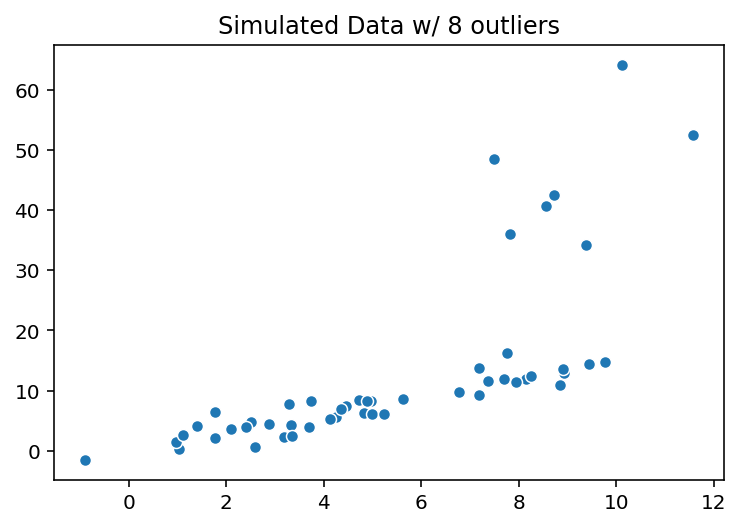

In [62]:
# b, x, e, y, sigma
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import t

# start by simulating some data
# y = bx + e
#np.random.seed(10)

b = 1.55
outlier_stdvs = [2, 5, 10, 15, 20, 25, 30, 35]
x = np.linspace(1, 10, 50)
x = x + norm.rvs(loc = 0, scale = 1, size = len(x))
df = pd.DataFrame(columns = ["y", "x", "outlier_sd"])
e1 = norm.rvs(loc = 0, scale = 2, size = len(x) - 8)

for error_sd in outlier_stdvs :
    e2 = norm.rvs(loc = 0, scale = error_sd, size = len(x) - len(e1))
    e = np.append(e1, e2)
    #np.random.shuffle(e)
    y = b * x + e
    tmp_df = pd.DataFrame(list(zip(y, x, np.repeat(error_sd, len(e)))), columns = ["y", "x", "outlier_sd"])
    df = pd.concat([df, tmp_df])
    
sns.scatterplot(x, y).set_title("Simulated Data w/ 8 outliers");

In [63]:
px.scatter(df, 
           x="x", 
           y="y", 
           trendline="ols",
           animation_frame="outlier_sd",
           range_y=[-10,70]) #, 
#            animation_group="country",
#            size="pop", 
#            color="continent", 
#            hover_name="country",
#            trendline="ols",
#            log_x=True, 
#            size_max=55, 
#            range_x=[100,100000], 
#            range_y=[25,90])

### Reverse Engineer Regression

Try to reverse the regression formula so that I can simulate random data and always get the same regression line

Regression coefficient:  2.3


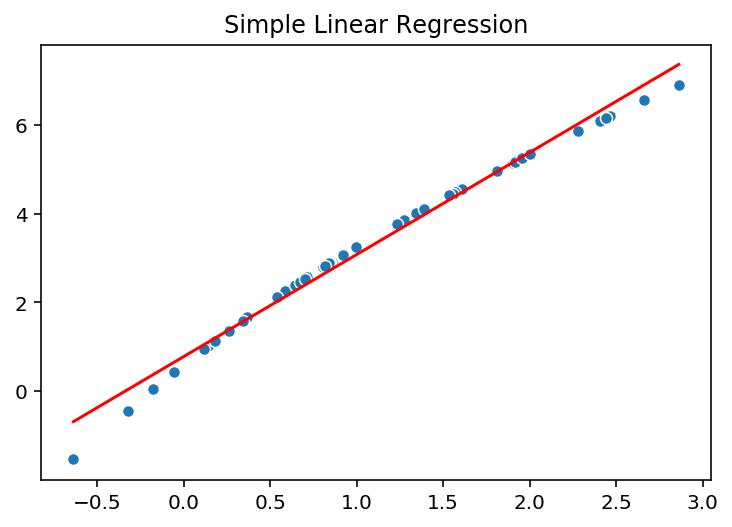

In [85]:
from sklearn.linear_model import LinearRegression

beta = 2.3
y = norm.rvs(loc = 3, scale = 2, size = 50)
err = norm.rvs(loc = 0, scale = 1, size = 50)
y = y + err
c = (y - np.mean(y)) / beta

x = c + np.sqrt(c**2 + 4)/2

reg = LinearRegression()
_ = reg.fit(x.reshape(-1, 1), y)

sns.scatterplot(x, y)
sns.lineplot(x, reg.predict(x.reshape(-1, 1)), 
             color = "red").set_title("Simple Linear Regression")

print("Regression coefficient: ", round(reg.coef_[0], 2));

## COVID Plot

Found something cool...

In [3]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter_geo(df, 
                     locations="iso_alpha", 
                     color="country", 
                     hover_name="country", 
                     size="pop",
                     animation_frame="year", 
                     projection="natural earth")
fig.show()

In [7]:
fig.write_html("../plotly_test.html")